#### 1.	Load csv file in notebook using python code 

In [2]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [36]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')

#### 2.	Explore Data using python code

In [5]:
display(df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
# Total records
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


None

In [9]:
# Null count
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
# Drop unneccessary column
df.drop(columns='id',inplace=True)

In [11]:
# Mean, median, std-dev for each numerical column

In [12]:
# Only extract the required statistics
summary = df.describe(exclude = 'object').loc[['mean', '50%', 'std']]
# Renaming the median column
summary.rename(index = {'50%' : 'median'}, inplace = True)
display(summary)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
median,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320


#### 1.	Plot charts and explain them in words(min 2 charts) 

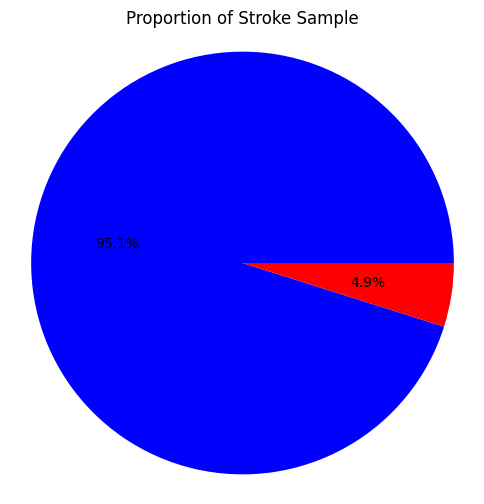

In [16]:
# Count the proportion of stroke cases
stroke_counts = df['stroke'].value_counts()
sizes = stroke_counts.values


# Pie Chart
plt.figure(figsize = (6,6))
plt.pie(sizes,  colors = ['blue', 'red'],autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of Stroke Sample')

plt.show()

## Explaination:
### The pie chart clear shows that we are dealing with an imbalanced dataset with greater number of non-stroke cases as compared to stroke cases. This may lead to model overfitting and cause bias in our model.

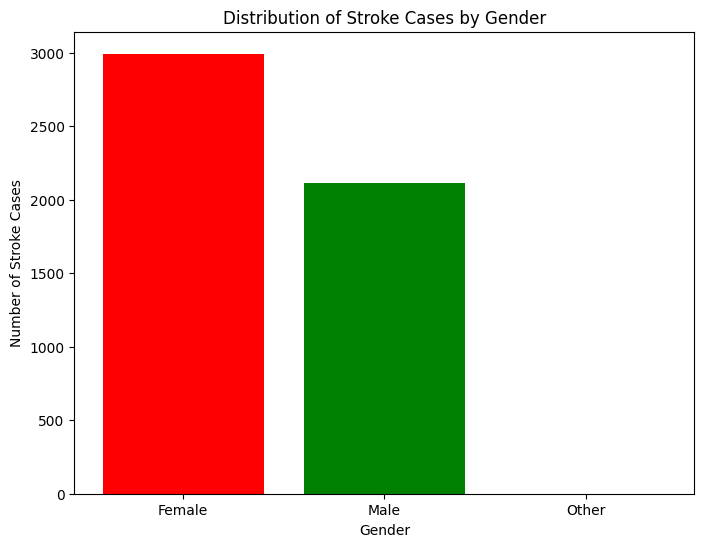

In [19]:
# Stroke cases depeding on gender
count = df['gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(count.index, count.values, color=['red', 'green', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Number of Stroke Cases')
plt.title('Distribution of Stroke Cases by Gender')
plt.show()

## Explaination:
### Compared to Males, Females have a greater number of stroke cases. There is no one in other genders who has faced a stroke case in our dataset

<Axes: xlabel='age'>

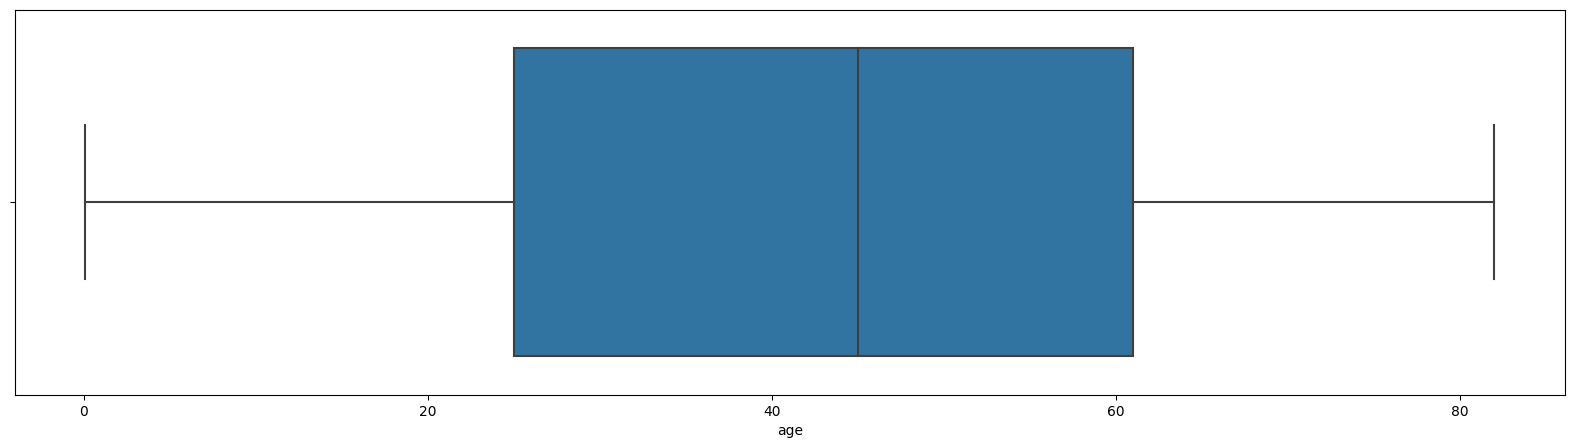

In [20]:
# Lets us check if any numerical values have outliers
plt.figure(figsize=(20,5))
sns.boxplot(x='age',data=df)

<Axes: xlabel='bmi'>

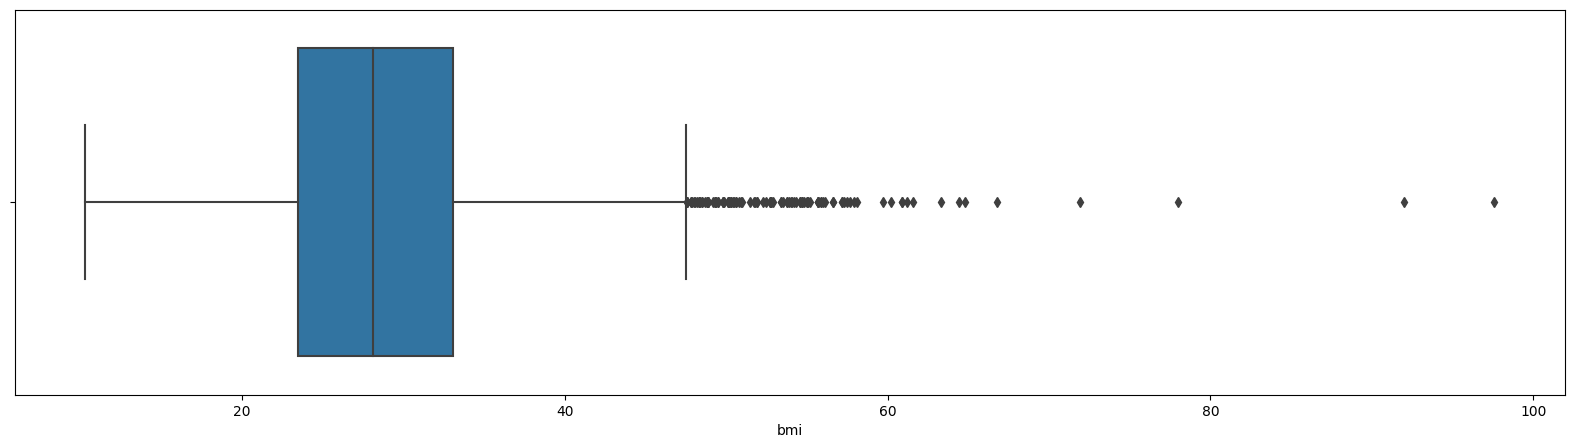

In [21]:
plt.figure(figsize=(20,5))
sns.boxplot(x='bmi',data=df)

<Axes: xlabel='avg_glucose_level'>

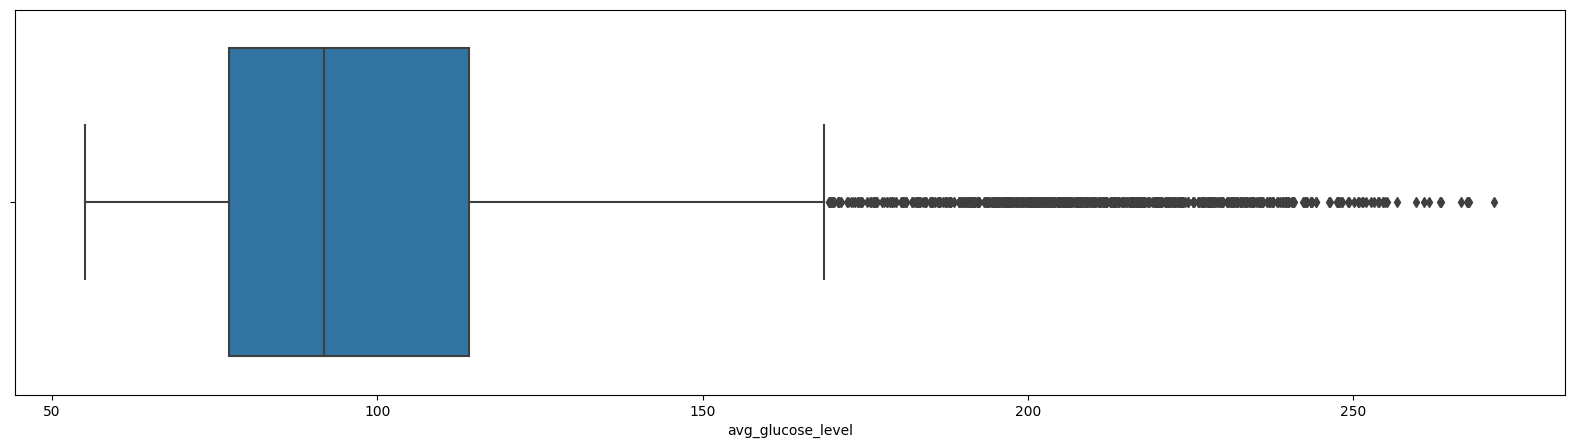

In [22]:
plt.figure(figsize=(20,5))
sns.boxplot(x='avg_glucose_level',data=df)

## Explaination:
### Only BMI and Average Glucose Level have outliers, we will remove them in further processes.

#### 2. Check if “BMI” column has null values? what is the percentage of null values ? use data engineering method to fill the null values.

In [24]:
missing_number = df.isnull().sum()
missing_percent = (missing_number / df.isnull().count()) * 100
missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
# Filter to show only the "BMI" column
missing_bmi = missing_values.loc[['bmi']]
display(missing_bmi)

,Missing_Number,Missing_Percent
bmi,201,3.933464


In [37]:
# Fill missing values in 'bmi' column with the mean
mean_bmi = df['bmi'].mean()
df['bmi'] = df['bmi'].fillna(mean_bmi)

### Creating new features:
#### has_diabetes and is_obese

1. According to Centers for Disease Control and Prevention, glucose level equal to or above 126 is accepted as diabetes.
2. BMI > 30 is obese

In [38]:
df['has_diabetes'] = [(1 if i >= 126 else 0) for i in df['avg_glucose_level']] 
df['is_obese'] = [1 if i >= 30 else 0 for i in df['bmi']]

In [39]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,has_diabetes,is_obese
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1,0


In [40]:
# Removing outlier
def outliers(column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define a threshold (e.g., 1.5 times the IQR)
    threshold = 1.5
    
    # Create a mask to identify outliers
    outliers_mask = (df[column_name] < Q1 - threshold * IQR) | (df[column_name] > Q3 + threshold * IQR)
    return outliers_mask

In [41]:
# Remove the outliers
df = df[~outliers('bmi')]
df = df[~outliers('avg_glucose_level')]

In [42]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,has_diabetes,is_obese
count,4390.000000,4390.000000,4390.000000,4390.000000,4390.000000,4390.000000,4390.000000,4390.000000,4390.000000
mean,36621.681777,40.887271,0.074260,0.039180,91.459481,27.812404,0.037585,0.079043,0.335308
std,21165.179643,22.538788,0.262223,0.194045,22.635039,6.562654,0.190213,0.269837,0.472152
min,67.000000,0.080000,0.000000,0.000000,55.120000,11.300000,0.000000,0.000000,0.000000
25%,17873.000000,23.000000,0.000000,0.000000,75.072500,23.200000,0.000000,0.000000,0.000000
50%,36990.000000,42.000000,0.000000,0.000000,88.040000,27.650000,0.000000,0.000000,0.000000
75%,54906.250000,58.000000,0.000000,0.000000,104.015000,31.900000,0.000000,0.000000,1.000000
max,72940.000000,82.000000,1.000000,1.000000,168.150000,46.200000,1.000000,1.000000,1.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4390 entries, 2 to 5109
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4390 non-null   int64  
 1   gender             4390 non-null   object 
 2   age                4390 non-null   float64
 3   hypertension       4390 non-null   int64  
 4   heart_disease      4390 non-null   int64  
 5   ever_married       4390 non-null   object 
 6   work_type          4390 non-null   object 
 7   Residence_type     4390 non-null   object 
 8   avg_glucose_level  4390 non-null   float64
 9   bmi                4390 non-null   float64
 10  smoking_status     4390 non-null   object 
 11  stroke             4390 non-null   int64  
 12  has_diabetes       4390 non-null   int64  
 13  is_obese           4390 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 514.5+ KB


In [44]:
# Using standard scaler to scale data
from sklearn.preprocessing import StandardScaler
to_scale = ['age', 'avg_glucose_level', 'bmi']
sc = StandardScaler()
df[to_scale]= sc.fit_transform(df[to_scale])

In [45]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,has_diabetes,is_obese
count,4390.000000,4.390000e+03,4390.000000,4390.000000,4.390000e+03,4.390000e+03,4390.000000,4390.000000,4390.000000
mean,36621.681777,-5.826774e-17,0.074260,0.039180,-1.311024e-16,-9.063871e-17,0.037585,0.079043,0.335308
std,21165.179643,1.000114e+00,0.262223,0.194045,1.000114e+00,1.000114e+00,0.190213,0.269837,0.472152
min,67.000000,-1.810742e+00,0.000000,0.000000,-1.605635e+00,-2.516404e+00,0.000000,0.000000,0.000000
25%,17873.000000,-7.937121e-01,0.000000,0.000000,-7.240477e-01,-7.029061e-01,0.000000,0.000000,0.000000
50%,36990.000000,4.937513e-02,0.000000,0.000000,-1.510874e-01,-2.474950e-02,0.000000,0.000000,0.000000
75%,54906.250000,7.593433e-01,0.000000,0.000000,5.547572e-01,6.229282e-01,0.000000,0.000000,1.000000
max,72940.000000,1.824296e+00,1.000000,1.000000,3.388519e+00,2.802173e+00,1.000000,1.000000,1.000000


In [46]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['ever_married']=le.fit_transform(df['ever_married'])
df['work_type']=le.fit_transform(df['work_type'])
df['Residence_type']=le.fit_transform(df['Residence_type'])
df['smoking_status']=le.fit_transform(df['smoking_status'])

In [47]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,has_diabetes,is_obese
2,31112,1,1.735550,0,1,1,2,0,0.638928,0.714365,2,1,0,1
6,53882,1,1.469312,1,1,1,2,0,-0.944196,-0.062848,2,1,0,0
7,10434,0,1.247446,0,0,0,2,1,0.129483,-0.763864,2,1,0,0
8,27419,0,0.803716,0,0,1,2,0,-0.676439,0.164713,0,1,0,0
9,60491,0,1.646804,0,0,1,2,1,-1.453200,-0.550511,0,1,0,0


In [48]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,has_diabetes,is_obese
2,31112,1,1.735550,0,1,1,2,0,0.638928,0.714365,2,1,0,1
6,53882,1,1.469312,1,1,1,2,0,-0.944196,-0.062848,2,1,0,0
7,10434,0,1.247446,0,0,0,2,1,0.129483,-0.763864,2,1,0,0
8,27419,0,0.803716,0,0,1,2,0,-0.676439,0.164713,0,1,0,0
9,60491,0,1.646804,0,0,1,2,1,-1.453200,-0.550511,0,1,0,0


#### Saving to CSV for MACHINE LEARNING

In [50]:
df.to_csv('preprocessed_stroke_data.csv', index=False)